## Regularization 

In [11]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cars = pd.read_csv("final_cars.csv")

In [13]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [14]:
X  = pd.get_dummies(X)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [20]:
lm = LassoCV(cv=5, normalize=False)
lm.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [21]:
# Display coefficient for each column
for t in zip(X.columns, lm.coef_):
  print(f"{t[0]:25s} {t[1]}")

length                    -0.0
width                     0.0
curb-weight               5.602177737223509
engine-size               105.64804500829145
highway-mpg               -0.0
make_alfa-romero          0.0
make_audi                 0.0
make_bmw                  0.0
make_chevrolet            0.0
make_dodge                -0.0
make_honda                0.0
make_isuzu                -0.0
make_jaguar               -0.0
make_mazda                0.0
make_mercedes-benz        0.0
make_mercury              -0.0
make_mitsubishi           -0.0
make_nissan               -0.0
make_peugot               -0.0
make_plymouth             -0.0
make_porsche              0.0
make_renault              -0.0
make_saab                 0.0
make_subaru               -0.0
make_toyota               -0.0
make_volkswagen           0.0
make_volvo                0.0
fuel-type_diesel          -0.0
fuel-type_gas             0.0
num-of-doors_four         -0.0
num-of-doors_two          0.0
body-style_convertible    

In [22]:
lm.coef_[ np.abs(lm.coef_) > 0]

array([  5.60217774, 105.64804501])

In [23]:
# Take a part of data for final testing 
y_test  = y[:100]
X_test = X[:100]
y_pred = lm.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  13092584.331336806
RMSE :  3618.3676335243777


In [26]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.86


## RandomForestRegressor 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9869475209985776


In [26]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.91


In [27]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6257180.3761794465
RMSE :  2501.4356630102334


In [28]:
for f,v in zip (X_train.columns, model.feature_importances_):
      print(f"{f:30} {v:0.2f}")

length                         0.02
width                          0.02
curb-weight                    0.27
engine-size                    0.55
horsepower                     0.04
city-mpg                       0.08
fuel-type_diesel               0.00
fuel-type_gas                  0.00
num-of-doors_four              0.00
num-of-doors_two               0.00
body-style_convertible         0.00
body-style_hardtop             0.00
body-style_hatchback           0.00
body-style_sedan               0.00
body-style_wagon               0.00
drive-wheels_4wd               0.00
drive-wheels_fwd               0.00
drive-wheels_rwd               0.00


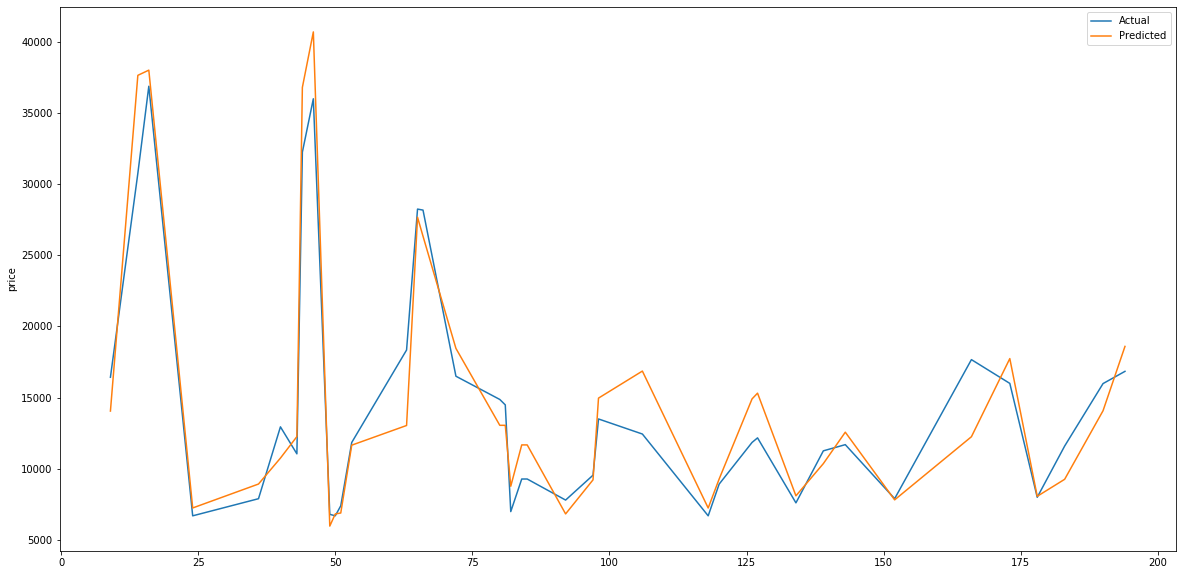

In [29]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [47]:
from sklearn.linear_model import SGDRegressor

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = SGDRegressor(random_state=100, penalty="l1")
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9400729944836433


In [52]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.92


In [53]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5109246.434989209
RMSE :  2260.364226178872
